In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
%matplotlib inline

plt.style.use('seaborn-colorblind')

## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

outDir = "/Users/danny/Repos/research/papers/2017_CompSurvey/figs/"

bboxprops = {'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7}

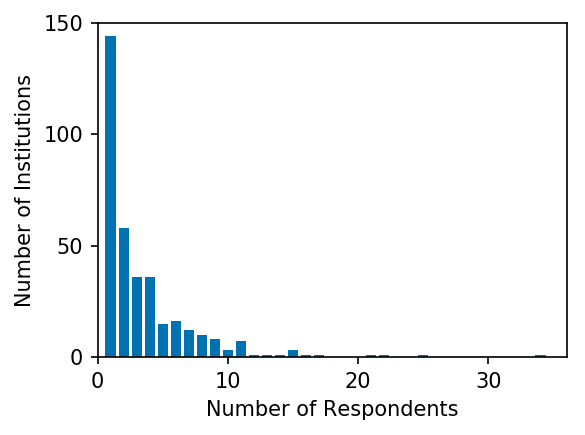

In [19]:
question = 'Q1'
qBySchool = df[['NAME', question]]

#print(qBySchool)

qTot = qBySchool.groupby(['NAME']).size()
#print(qTot)
# fig, ax = plt.subplots(figsize=(8, 5))
# qTot.hist(log=True, range=(0, 35), bins=36, ax=ax)
# ax.set_xlabel('N university')

hist, edges = np.histogram(a=qTot.values, bins=35, range=(0, 35))
#hist = hist/hist.sum()
fig, ax = plt.subplots(figsize = (4, 3), dpi = 150)
#ax.axis([0,35,0,200])
ax.bar(edges[:-1], hist)
#ax.set_yscale('log')
ax.set_ylim(ymin=1, ymax=150)
ax.set_xlim(xmin=0, xmax=36)
ax.set_yticks([0,50,100,150])
ax.set_xlabel('Number of Respondents')
ax.set_ylabel('Number of Institutions')

plt.tight_layout()
plt.savefig(outDir + 'Respondents.pdf')

In [20]:
print(hist)

[  0 144  58  36  36  15  16  12  10   8   3   7   1   1   1   3   1   1
   0   0   0   1   1   0   0   1   0   0   0   0   0   0   0   0   1]


In [21]:
question = 'Q1'
qBySchoolAndDegree = df[['NAME','Phy.Degfact', question]]

qTot = qBySchoolAndDegree.groupby(['NAME','Phy.Degfact']).size()
qTot

NAME                                            Phy.Degfact
Alabama A & M University                        Phd             1
Albright College                                Bachelors       1
Alfred University                               Bachelors       3
Allan Hancock College                           Associates      2
Allegany College of Maryland                    Associates      1
Amarillo College                                Associates      1
American University                             Bachelors       4
Amherst College                                 Bachelors       6
Andrews University                              Bachelors       2
Antelope Valley College                         Associates      1
Appalachian State University                    Masters        11
Arapahoe Community College                      Associates      1
Arkansas State University-Mountain Home         Associates      1
Arkansas Tech University                        Bachelors       2
Asheville-Buncom

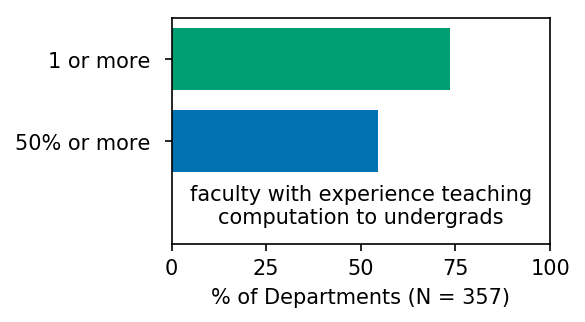

In [194]:
## Teaching Computation at all

question = 'Q1'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)
#print(qFrac.head())

numberOfSchoolsWithOneTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()
numberOfUniqueSchools = df['NAME'].nunique()

atLeastOne = numberOfSchoolsWithOneTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig = plt.figure(figsize=(4, 2.25), dpi=150, facecolor='w', edgecolor='k')
plt.barh([0],[atLeastFifty[0]], height=0.75)
plt.barh([1],[atLeastOne[0]], height=0.75)

plt.xlabel('% of Departments (N = 357)');
plt.yticks([0,1],['50% or more ','1 or more ']);
plt.text(50,-1,'faculty with experience teaching\ncomputation to undergrads',ha='center')
plt.axis([0,100,-1.25,1.5]);
plt.xticks([0,25,50,75,100]);
plt.tight_layout()
#plt.text(75, 0, 'N = 357', bbox = bboxprops, ha='center');
plt.savefig(outDir + 'Q1.pdf')

In [42]:
qBySchool = df[['NAME','Q11']]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool['Q11'] > 0) & (qBySchool['Q11'] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)
qFrac.head(n=10)

,Q11
NAME,
Alabama A & M University,0.000000
Albright College,1.000000
Alfred University,1.000000
Allan Hancock College,0.000000
Allegany College of Maryland,0.000000
Amarillo College,0.000000
American University,0.750000
Amherst College,0.666667
Andrews University,1.000000


In [43]:
qFrac[qFrac > 0.5].count()

Q11    100
dtype: int64

In [50]:
## Teaching computaiton in Intro Physics

question = 'Q8'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOneIntro = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFiftyIntro = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q8    191
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q8    85
dtype: int64


In [51]:
## Teaching computaiton in Advanced Physics

question = 'Q11'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)
#print(qFrac.head(n=10))

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

# print('Number of Unique Schools: ', numberOfUniqueSchools)
# print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
# print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOneAdv = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFiftyAdv = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

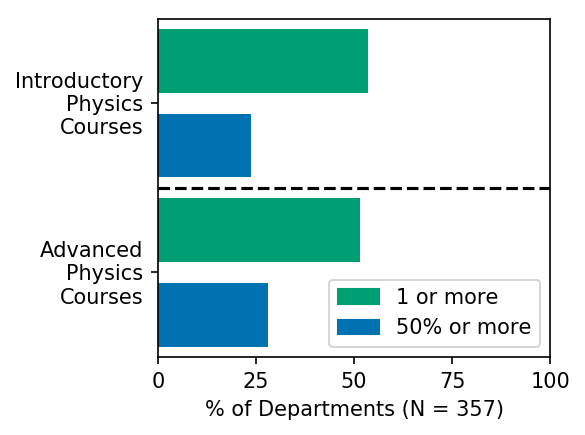

In [147]:
fig = plt.figure(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.barh([2],[atLeastFiftyIntro[0]], height=0.75)
plt.barh([3],[atLeastOneIntro[0]], height=0.75)
plt.barh([0],[atLeastFiftyAdv[0]], height=0.75, color = 'C0')
plt.barh([1],[atLeastOneAdv[0]], height=0.75, color = 'C1')

plt.xlabel('% of Departments (N = 357)');
#plt.ylabel('Advanced Physics')
plt.yticks(np.arange(0.5,4,2),['Advanced\nPhysics\nCourses','Introductory\nPhysics\nCourses']);
plt.axis([0,100,-.5,3.5]);
plt.xticks([0,25,50,75,100]);


One_Patch =  mpatches.Patch(color='C1', label='1 or more')
Fifty_Patch =  mpatches.Patch(color='C0', label='50% or more')
plt.legend(handles=[One_Patch,Fifty_Patch])

plt.plot([0, 100],[1.5, 1.5], '--k')
#plt.legend(handles=[adv_patch,int_patch])
#plt.legend(['Adv.','Intro.'])
# plt.text(75, 2.5, 'Advanced', ha='center')
# plt.text(75, 0.5, 'Intro', ha='center')

plt.tight_layout()
plt.savefig(outDir + 'Q8and11.pdf')

In [285]:
chi2_contingency([(357-100,100),(357-85,85)])

(1.4299698564348848, 0.23176935799131865, 1, array([[ 264.5,   92.5],
        [ 264.5,   92.5]]))

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q14    192
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q14    101
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


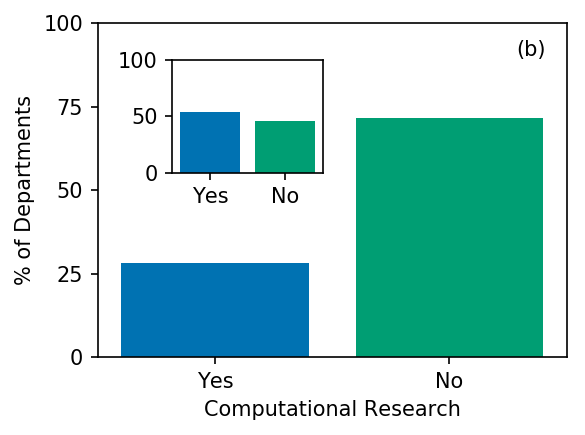

In [279]:
## Teaching computaiton through research

question = 'Q14'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOne = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel('Computational Research')

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(1.35, 90, '(b)', ha='center')

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInsetResearch.pdf')

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q17    9
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q17    5
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


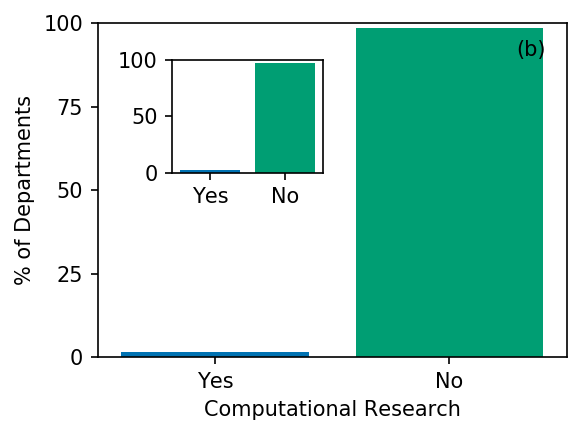

In [284]:
## does not

question = 'Q17'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOne = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel('Computational Research')

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(1.35, 90, '(b)', ha='center')

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInsetResearch.pdf')

In [108]:
## Get only YES folks
onlyYesDF = df.loc[df['Q1'] == 1]

In [112]:
## Comp on Exams?

question = 'Q34'
label = 'Computational Exams?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(d)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

# print('Number of Unique Schools: ', numberOfUniqueSchools)
# print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
# print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOneCE = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFiftyCE = numberOfSchoolsWithFiftyPercent/195*100
#plt.text(75, 0, 'N = 357', bbox = bboxprops, ha='center');

#plt.savefig(outDir + 'CompExams.pdf')

In [113]:
## Comp on Exams?

question = 'Q32'
label = 'Computational Homework?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(a)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOneCH = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFiftyCH = numberOfSchoolsWithFiftyPercent/195*100

Number of Unique Schools:  263
Number of Schools with at least one:  Q32    182
dtype: int64
Number of Schools with at least fifty percent:  Q32    106
dtype: int64


In [114]:
## Comp Projs?

question = 'Q38'
label = 'Computational Projects?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(b)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOneCP = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFiftyCP = numberOfSchoolsWithFiftyPercent/195*100

Number of Unique Schools:  263
Number of Schools with at least one:  Q38    170
dtype: int64
Number of Schools with at least fifty percent:  Q38    98
dtype: int64


In [115]:
## Comp IE?

question = 'Q33'
label = 'Interactive Computational Activities?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(c)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOneIE = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFiftyIE = numberOfSchoolsWithFiftyPercent/195*100

Number of Unique Schools:  263
Number of Schools with at least one:  Q33    104
dtype: int64
Number of Schools with at least fifty percent:  Q33    34
dtype: int64


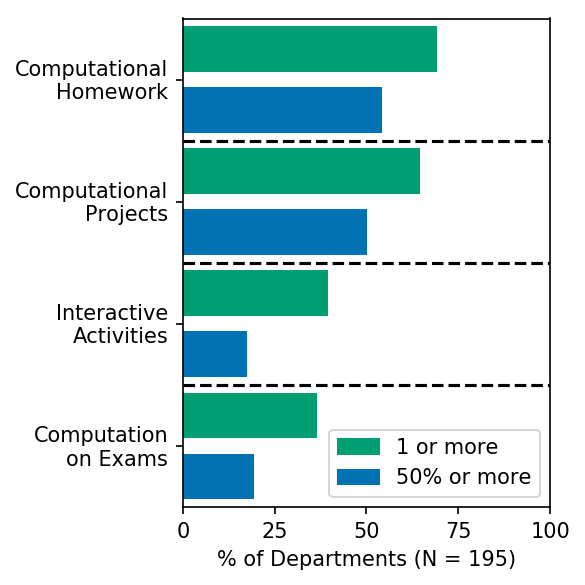

In [146]:
fig = plt.figure(figsize=(4, 4), dpi=150, facecolor='w', edgecolor='k')

plt.barh([0],[atLeastFiftyCE[0]], height=0.75, color='C0')
plt.barh([1],[atLeastOneCE[0]], height=0.75, color='C1')
plt.barh([2],[atLeastFiftyIE[0]], height=0.75, color='C0')
plt.barh([3],[atLeastOneIE[0]], height=0.75, color='C1')
plt.barh([4],[atLeastFiftyCP[0]], height=0.75, color='C0')
plt.barh([5],[atLeastOneCP[0]], height=0.75, color='C1')
plt.barh([6],[atLeastFiftyCH[0]], height=0.75, color='C0')
plt.barh([7],[atLeastOneCH[0]], height=0.75, color='C1')


plt.xlabel('% of Departments (N = 195)');

plt.yticks(np.arange(0.5,8,2),
           ['Computation\non Exams','Interactive\nActivities','Computational\nProjects','Computational\nHomework']);

plt.plot([0, 100],[1.5, 1.5], '--k')
plt.plot([0, 100],[3.5, 3.5], '--k')
plt.plot([0, 100],[5.5, 5.5], '--k')


plt.axis([0,100,-.5,7.5]);
plt.xticks([0,25,50,75,100]);

# plt.text(80, 0.5, 'Projects?', ha='center')
# plt.text(80, 2.5, 'Homework?', ha='center')
# plt.text(80, 4.5, 'Interactive\nActivities?', ha='center')
# plt.text(80, 6.5, 'Exams', ha='center')

One_Patch =  mpatches.Patch(color='C1', label='1 or more')
Fifty_Patch =  mpatches.Patch(color='C0', label='50% or more')
plt.legend(handles=[One_Patch,Fifty_Patch])

plt.tight_layout()
plt.savefig(outDir + 'ActivityType.pdf')

In [150]:
## Comp Degree?

question = 'Q2'
label = 'Computational Physics Degree?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(a)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOneDeg = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFiftyDeg = numberOfSchoolsWithFiftyPercent/195*100

Number of Unique Schools:  263
Number of Schools with at least one:  Q2    47
dtype: int64
Number of Schools with at least fifty percent:  Q2    14
dtype: int64


In [151]:
## Comp Minor?

question = 'Q3'
label = 'Computational Physics Minor?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(a)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOneMinor = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFiftyMinor = numberOfSchoolsWithFiftyPercent/195*100

Number of Unique Schools:  263
Number of Schools with at least one:  Q3    21
dtype: int64
Number of Schools with at least fifty percent:  Q3    5
dtype: int64


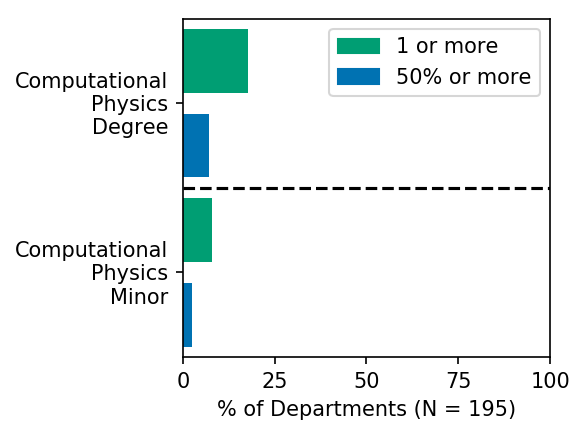

In [156]:
fig = plt.figure(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

plt.barh([0],[atLeastFiftyMinor[0]], height=0.75, color='C0')
plt.barh([1],[atLeastOneMinor[0]], height=0.75, color='C1')
plt.barh([2],[atLeastFiftyDeg[0]], height=0.75, color='C0')
plt.barh([3],[atLeastOneDeg[0]], height=0.75, color='C1')


plt.xlabel('% of Departments (N = 195)');

plt.yticks(np.arange(0.5,8,2),
           ['Computational\nPhysics\nMinor','Computational\nPhysics\nDegree']);

plt.plot([0, 100],[1.5, 1.5], '--k')

plt.axis([0,100,-.5,3.5]);
plt.xticks([0,25,50,75,100]);

One_Patch =  mpatches.Patch(color='C1', label='1 or more')
Fifty_Patch =  mpatches.Patch(color='C0', label='50% or more')
plt.legend(handles=[One_Patch,Fifty_Patch])

plt.tight_layout()
plt.savefig(outDir + 'DegMinProgram.pdf')

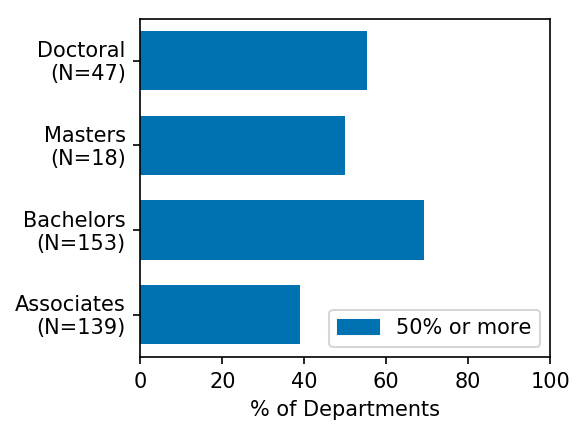

In [173]:
df.head()
question = 'Q1'
qBySchoolByDegree = df[['NAME', 'Phy.Degfact', question]]

qTot = qBySchoolByDegree.groupby(['NAME', 'Phy.Degfact']).count()
qYes = qBySchoolByDegree[(qBySchoolByDegree[question] > 0) &
                             (qBySchoolByDegree[question] <= 1)].groupby(['NAME', 'Phy.Degfact']).count()

totProg = qTot.groupby(['Phy.Degfact']).count()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

qFrac.head(n=10)

schoolsWithOne = qFrac[(qFrac[question] > 0)]
schoolsWithFiftyP = qFrac[qFrac[question] > 0.5]

withOne = schoolsWithOne.groupby(['Phy.Degfact']).count()
withFiftyP = schoolsWithFiftyP.groupby(['Phy.Degfact']).count()

onefrac = withOne/totProg*100
fiftyfrac = withFiftyP/totProg*100

#onefrac.head()
fig = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

plt.barh(np.arange(0,4,1), fiftyfrac[question].tolist(), height=0.7)
#plt.barh(np.arange(1,8,2), (100-fiftyfrac[question]).tolist(), height=0.7)
plt.xlabel('% of Departments')
plt.yticks(np.arange(0,4),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=0)
plt.axis([0,100,-.5,3.5])
One_Patch =  mpatches.Patch(color='C1', label='1 or more')
Fifty_Patch =  mpatches.Patch(color='C0', label='50% or more')
plt.legend(handles=[Fifty_Patch])
plt.tight_layout()

plt.savefig(outDir + '50PercentByDegree.pdf')

In [268]:
from scipy.stats import chi2_contingency

chi2_contingency([withFiftyP[question],totProg[question]-withFiftyP[question]])

(27.380755222457182,
 4.8986781432252924e-06,
 3,
 array([[ 75.92436975,  83.57142857,   9.83193277,  25.67226891],
        [ 63.07563025,  69.42857143,   8.16806723,  21.32773109]]))

In [271]:
chi2_contingency([withFiftyP[question][1:3],totProg[question][1:3]-withFiftyP[question][1:3]])

(1.9135584124954335,
 0.16656851962552666,
 1,
 array([[ 102.89473684,   12.10526316],
        [  50.10526316,    5.89473684]]))

In [272]:
chi2_contingency([withFiftyP[question][2:4],totProg[question][2:4]-withFiftyP[question][2:4]])

(0.011433355848249442,
 0.91484699502622435,
 1,
 array([[  9.69230769,  25.30769231],
        [  8.30769231,  21.69230769]]))

In [275]:
chi2_contingency([withFiftyP[question][1:4:2],totProg[question][1:4:2]-withFiftyP[question][1:4:2]])

(2.5321808727536474, 0.11154595132194085, 1, array([[ 100.98,   31.02],
        [  52.02,   15.98]]))